**Step-1 : Read the data**

In [1]:
import pandas as pd
data=pd.read_csv("winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Step-2 : EDA**

- Missing values

- outliers

**Step-3 : Feature selection**

                      fixed acidity  volatile acidity  citric acid  ...  sulphates   alcohol   quality
fixed acidity              1.000000         -0.256131     0.671703  ...   0.183006 -0.061668  0.124052
volatile acidity          -0.256131          1.000000    -0.552496  ...  -0.260987 -0.202288 -0.390558
citric acid                0.671703         -0.552496     1.000000  ...   0.312770  0.109903  0.226373
residual sugar             0.114777          0.001918     0.143577  ...   0.005527  0.042075  0.013732
chlorides                  0.093705          0.061298     0.203823  ...   0.371260 -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504    -0.060978  ...   0.051658 -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470     0.035533  ...   0.042947 -0.205654 -0.185100
density                    0.668047          0.022026     0.364947  ...   0.148506 -0.496180 -0.174919
pH                        -0.682978          0.234937    -0.541904  ...  

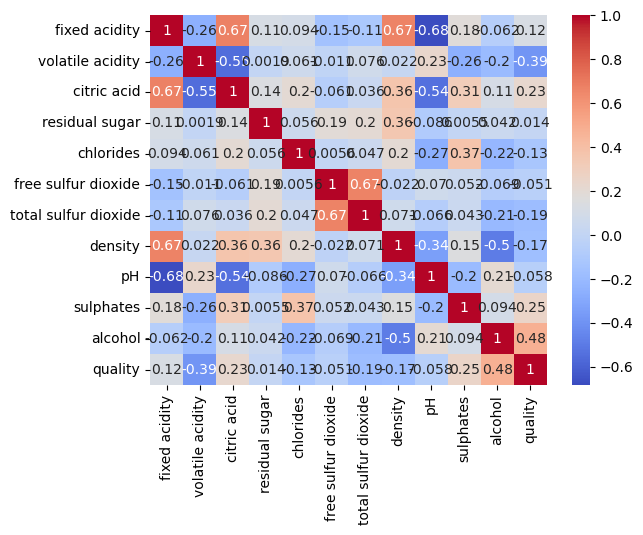

                 Columns          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866


In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix=data.corr()
print(corr_matrix)

sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.show()

X=data.drop("quality",axis=1)
vif_vals=[]
for i in range(len(X.columns)):
    vif_vals.append(variance_inflation_factor(X.values,i))
vif_df=pd.DataFrame(zip(X.columns,vif_vals),columns=["Columns","VIF"])
print(vif_df)

In [6]:
vif_thresold=15
features_to_keep=vif_df[vif_df["VIF"]<vif_thresold]["Columns"].values
features_to_keep

array(['citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide'], dtype=object)

In [9]:
new_df=data[features_to_keep]
new_df["quality"]=data["quality"]
new_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_18256\3214520948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["quality"]=data["quality"]


,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,quality
0,0.00,1.9,0.076,11.0,34.0,5
1,0.00,2.6,0.098,25.0,67.0,5
2,0.04,2.3,0.092,15.0,54.0,5
3,0.56,1.9,0.075,17.0,60.0,6
4,0.00,1.9,0.076,11.0,34.0,5
...,...,...,...,...,...,...
1594,0.08,2.0,0.090,32.0,44.0,5
1595,0.10,2.2,0.062,39.0,51.0,6
1596,0.13,2.3,0.076,29.0,40.0,6
1597,0.12,2.0,0.075,32.0,44.0,5


In [19]:
#scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=new_df.drop("quality",axis=1)
scaled_val=ss.fit_transform(X)
scaled_df=pd.DataFrame()
scaled_df[features_to_keep]=scaled_val
scaled_df["quality"]=new_df["quality"]
scaled_df

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,quality
0,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,5
1,-1.391472,0.043416,0.223875,0.872638,0.624363,5
2,-1.186070,-0.169427,0.096353,-0.083669,0.229047,5
3,1.484154,-0.453218,-0.264960,0.107592,0.411500,6
4,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,5
...,...,...,...,...,...,...
1594,-0.980669,-0.382271,0.053845,1.542054,-0.075043,5
1595,-0.877968,-0.240375,-0.541259,2.211469,0.137820,6
1596,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,6
1597,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,5


**Step-4 : divide X (input) and y (output) columns**

In [20]:
X=scaled_df.drop("quality",axis=1)
y=scaled_df["quality"]
X,y

(      citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide
 0       -1.391472       -0.453218  -0.243707            -0.466193             -0.379133
 1       -1.391472        0.043416   0.223875             0.872638              0.624363
 2       -1.186070       -0.169427   0.096353            -0.083669              0.229047
 3        1.484154       -0.453218  -0.264960             0.107592              0.411500
 4       -1.391472       -0.453218  -0.243707            -0.466193             -0.379133
 ...           ...             ...        ...                  ...                   ...
 1594    -0.980669       -0.382271   0.053845             1.542054             -0.075043
 1595    -0.877968       -0.240375  -0.541259             2.211469              0.137820
 1596    -0.723916       -0.169427  -0.243707             1.255161             -0.196679
 1597    -0.775267       -0.382271  -0.264960             1.542054             -0.075043
 1598     1.021999   

**Step-5 : Split train test data**

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train,X_test,y_train,y_test

(      citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide
 937      1.176051       -0.807957  -0.349975            -0.944346             -0.622404
 1319     2.100359       -0.595114   6.940051             0.203223              0.533136
 1496    -0.056360       -0.453218   0.032592             0.681377              3.057081
 402      1.381453        0.043416  -0.052423             0.298854              0.533136
 291      1.073350       -0.382271   5.431037            -0.944346             -0.865676
 ...           ...             ...        ...                  ...                   ...
 911      0.970649        4.584075   0.563935            -1.231239             -1.139357
 442      2.511163        0.823842   0.266383            -0.944346             -0.105452
 338      1.586855        0.327207   0.330144             1.159531              1.597450
 758     -1.391472       -0.240375  -0.073677            -0.561823             -0.470360
 1007     0.354443   

**Step-6 : Model development**

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Step-7 : Prediction**

In [24]:
y_pred=model.predict(X_test)
print(y_pred)

residuals=y_test-y_pred
print(residuals)

[5.95909376 5.63921091 5.70292271 5.48047388 5.97869039 5.48875941
 5.88127443 5.69000805 5.17360257 6.05484813 5.5758165  5.84286191
 5.16760487 5.37661381 5.86367748 6.18210389 5.59435408 5.29975749
 5.33155466 5.60148072 5.0891974  5.75876161 5.44537446 4.97233082
 5.62252298 5.52353469 5.63057858 5.79962572 5.04089309 5.85485621
 5.51267214 5.46897797 5.98262794 5.96173718 5.3495585  5.99346309
 5.77968556 5.51145729 5.85466605 6.00466497 5.40071882 5.69078561
 5.54904806 5.68945976 5.65081916 5.36305343 5.8282142  6.1114054
 5.48654838 5.27736852 5.63963809 5.41797422 6.07354215 5.68168348
 5.24359088 6.05686812 5.2850399  5.99147437 5.50027048 5.47411401
 5.86987066 5.87440463 5.7694135  5.80588147 5.19648948 5.87870065
 5.575417   5.89855885 5.59635867 5.51128295 5.45558752 5.67053639
 5.80758826 5.23795094 5.48817863 6.16562875 5.98262794 5.96851156
 5.84978635 5.977993   5.5188005  5.56823683 5.95995267 5.63520063
 5.3655346  5.73584685 5.98191683 6.24960559 5.42987703 5.75537

**Step-8 : Assumptions**

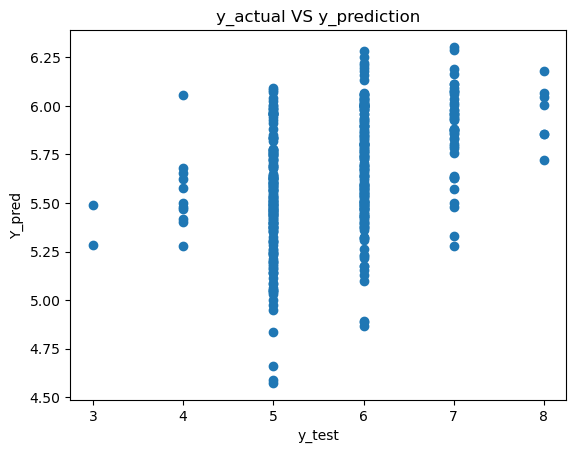

In [29]:
# Linearity
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("Y_pred")
plt.title("y_actual VS y_prediction")
plt.show()

In [39]:
# durbin watson
from statsmodels.stats.stattools import durbin_watson
dw_val=durbin_watson(residuals)
dw_val

2.1470986872824764

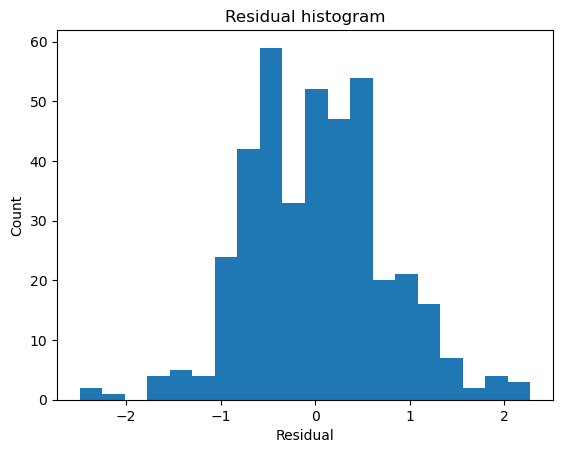

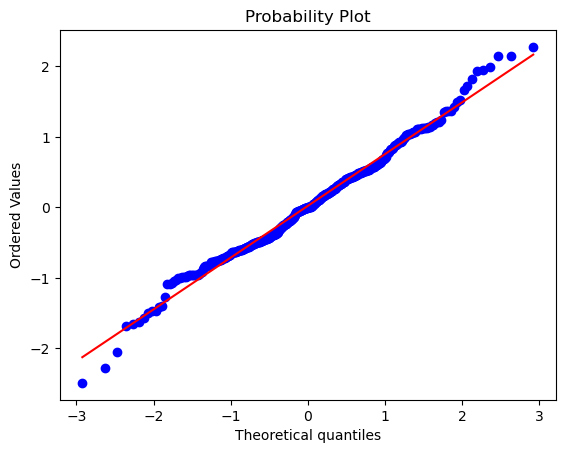

In [40]:
# Q-Q plot
import scipy.stats as stats

plt.hist(residuals,bins=20)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual histogram")
plt.show()

stats.probplot(residuals,dist="norm",plot=plt)
plt.show()

**Step-9 : Model evaluation**

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)

print(f"MAE = {mae}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")
print(f"r2_score = {r2}")

MAE = 0.5815390331868103
MSE = 0.5386711350955387
RMSE = 0.7339421878428427
r2_score = 0.15858107784473296


**Step-10 : Save the model**

In [44]:
import pickle

pickle.dump(model,open("wine_model.pkl","wb"))

In [45]:
import joblib

joblib.dump(model,"model.joblib")

['model.joblib']

In [46]:
features_to_keep

array(['citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide'], dtype=object)